# Clustering & Fitting

In [173]:
import pandas as pd

data = pd.read_csv('Iris.csv')  # Replace with your actual path


In [174]:
# Check for missing values
data.isnull().sum()

# Show the first few rows
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [175]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Fitting and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, silhouette_score


In [176]:
# Basic statistics
data.describe()

# Check the distribution of target classes
data['Species'].value_counts()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

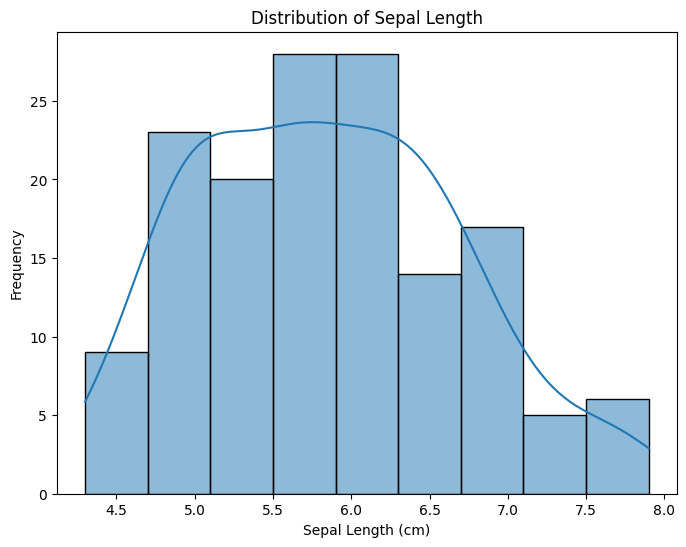

In [177]:
# Histogram for Sepal length
plt.figure(figsize=(8, 6))
sns.histplot(data['SepalLengthCm'], kde=True)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


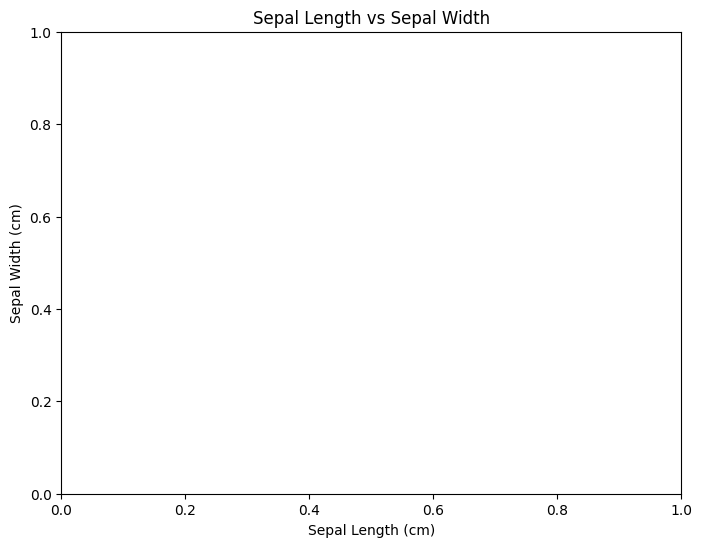

In [178]:


# Scatter plot of Sepal length vs. Sepal width
plt.figure(figsize=(8, 6))
# sns.regplot(x='SepalLengthCm', y='SepalWidthCm', data=data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
# sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=data, hue='Species')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


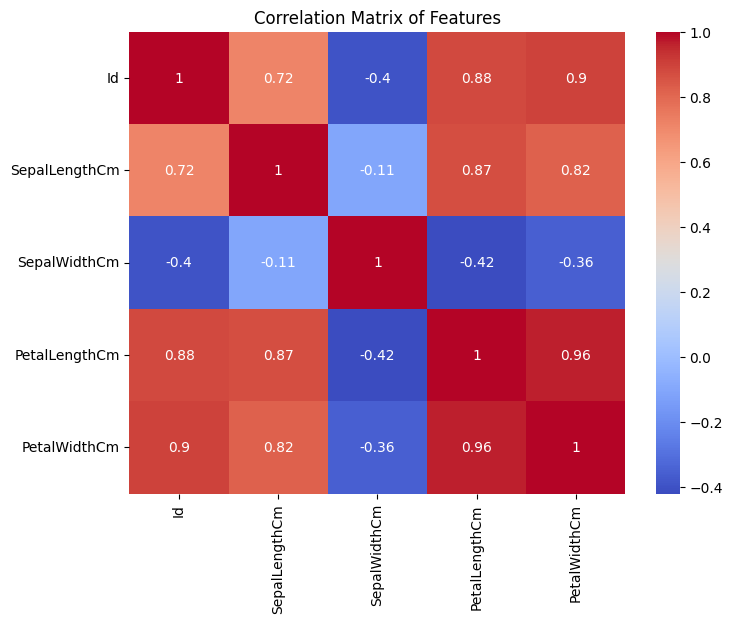

In [179]:
# Correlation matrix
corr = data.drop(columns='Species').corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


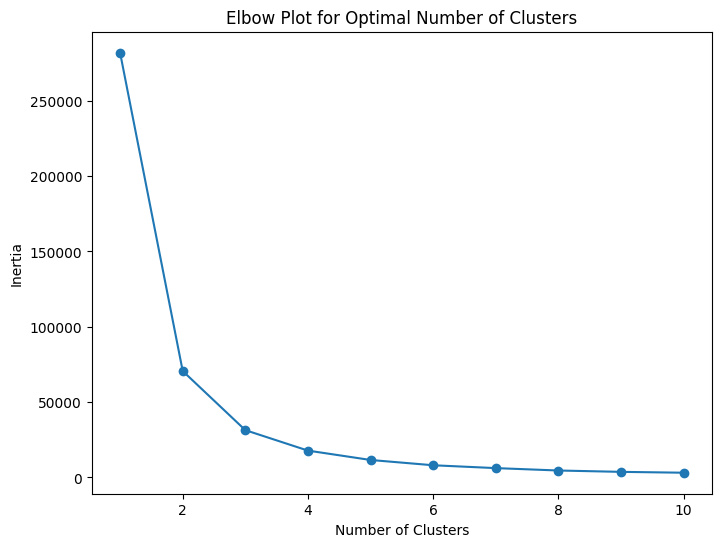

In [180]:
# Elbow plot
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data.drop(columns='Species'))
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



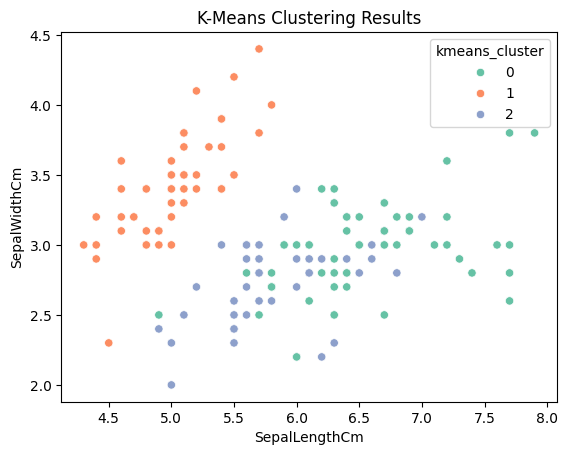

In [181]:
# K-Means Clustering (Assuming 3 clusters based on Elbow plot)
kmeans = KMeans(n_clusters=3)
data['kmeans_cluster'] = kmeans.fit_predict(data.drop(columns='Species'))

# Show the clustering results
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=data, hue='kmeans_cluster', palette='Set2')
plt.title('K-Means Clustering Results')
plt.show()


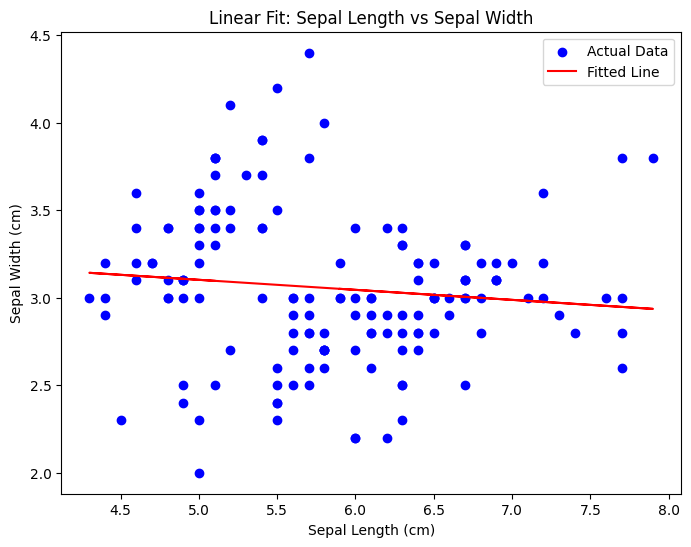

In [182]:


# Define X and y
X = data[['SepalLengthCm']]  # Corrected column name
y = data['SepalWidthCm']  # Corrected column name

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.title('Linear Fit: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


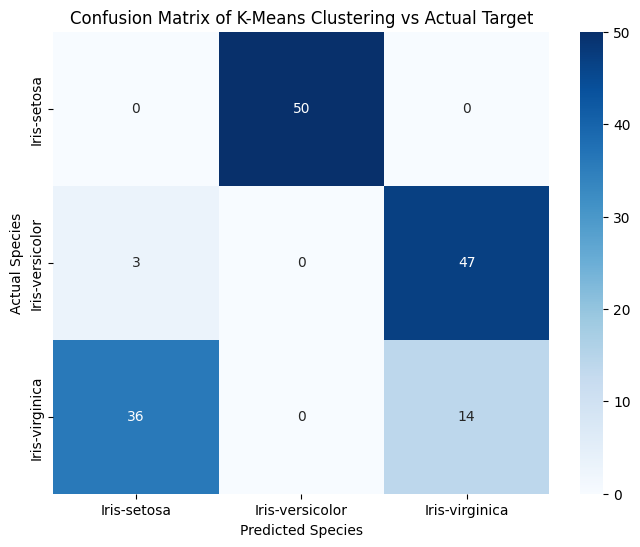

In [183]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is 'data' and the target variable is 'Species'
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Feature columns

# Fit the K-Means model (3 clusters for the 3 species in Iris dataset)
kmeans = KMeans(n_clusters=3, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(X)

# Map the K-means cluster labels to species names
cluster_to_species = {
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
}

# Map the K-means cluster numbers back to species names
data['kmeans_species'] = data['kmeans_cluster'].map(cluster_to_species)

# Confusion matrix (compare K-Means clusters with actual species labels)
cm = confusion_matrix(data['Species'], data['kmeans_species'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title('Confusion Matrix of K-Means Clustering vs Actual Target')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()


In [184]:

# # Confusion matrix (for example, comparing K-Means vs Actual Target)
# cm = confusion_matrix(data['Species'], data['kmeans_cluster'])

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
# plt.title('Confusion Matrix of K-Means Clustering vs Actual Target')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()
